## Convolutional Neural Network "from scratch"



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
# Create the session to correctly work with local GPU

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [78]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage import transform
from IPython import display

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'Cats_and_Dogs/train/'
val =   'Cats_and_Dogs/val'
test =  'Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# batch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function for training deep neural networks _ImageGenerator_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Operation model.add (Dropout (0.5)) - excludes a neuron from the current layer with a 50% probability to avoid overfitting. retraining.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [12]:
model = Sequential()

# 1
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2
model.add(MaxPooling2D((2, 2)))

# 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4
model.add(MaxPooling2D((2, 2)))

# 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6
model.add(MaxPooling2D(2, 2))

# 7
model.add(Flatten())

# 8
model.add(Dense(64, activation='relu'))

# 9
model.add(Dropout(0.5))

# 10
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 38s 122ms/step - loss: 0.6689 - accuracy: 0.5870 - val_loss: 0.5439 - val_accuracy: 0.7352
Epoch 2/10
312/312 [==============================] - 37s 120ms/step - loss: 0.5317 - accuracy: 0.7326 - val_loss: 0.4585 - val_accuracy: 0.7928
Epoch 3/10
312/312 [==============================] - 37s 120ms/step - loss: 0.4570 - accuracy: 0.7921 - val_loss: 0.4403 - val_accuracy: 0.8051
Epoch 4/10
312/312 [==============================] - 37s 120ms/step - loss: 0.4142 - accuracy: 0.8135 - val_loss: 0.4238 - val_accuracy: 0.7981
Epoch 5/10
312/312 [==============================] - 38s 120ms/step - loss: 0.3728 - accuracy: 0.8407 - val_loss: 0.4031 - val_accuracy: 0.8191
Epoch 6/10
312/312 [==============================] - 37s 120ms/step - loss: 0.3308 - accuracy: 0.8583 - val_loss: 0.3902 - val_accuracy: 0.8232
Epoch 7/10
312/312 [==============================] - 37s 120ms/step - loss: 0.3100 - accuracy: 0.8660 - val_loss: 0.3783 - val_ac

In [15]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 85.06%


Plot the graphs: Loss(Number of epochs), Accuracy(Number of epochs)

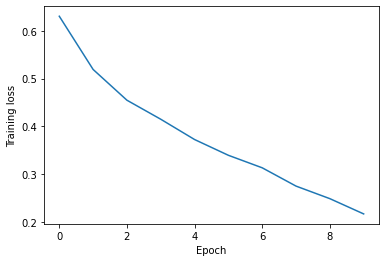

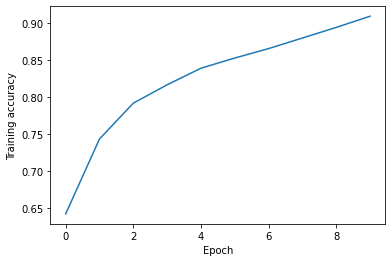

In [26]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()

![alt text](Deeper.jpeg )

##  

Let's try to improve the quality of recognition, using the method of transfer lerning - "transfer training." 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with another avaliable pre-trained deep learning model from keras application.
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to)

In [27]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [28]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


![alt text](VGG16.png )

and it becomes:

![alt text](VGG162.png )

In [33]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 38s 121ms/step - loss: 0.1981 - accuracy: 0.9194 - val_loss: 0.2148 - val_accuracy: 0.9211
Epoch 2/10
312/312 [==============================] - 37s 120ms/step - loss: 0.1922 - accuracy: 0.9221 - val_loss: 0.2153 - val_accuracy: 0.9198
Epoch 3/10
312/312 [==============================] - 38s 120ms/step - loss: 0.1879 - accuracy: 0.9242 - val_loss: 0.2122 - val_accuracy: 0.9194
Epoch 4/10
312/312 [==============================] - 38s 120ms/step - loss: 0.1871 - accuracy: 0.9245 - val_loss: 0.2097 - val_accuracy: 0.9211
Epoch 5/10
312/312 [==============================] - 37s 120ms/step - loss: 0.1833 - accuracy: 0.9259 - val_loss: 0.2074 - val_accuracy: 0.9223
Epoch 6/10
312/312 [==============================] - 38s 120ms/step - loss: 0.1792 - accuracy: 0.9283 - val_loss: 0.2081 - val_accuracy: 0.9227
Epoch 7/10
312/312 [==============================] - 38s 120ms/step - loss: 0.1752 - accuracy: 0.9288 - val_loss: 0.2091 - val_ac

In [34]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 90.99%


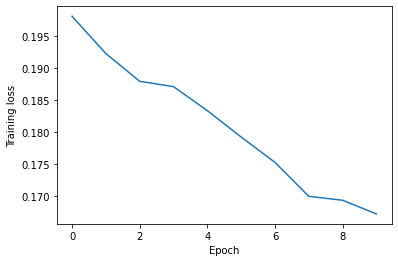

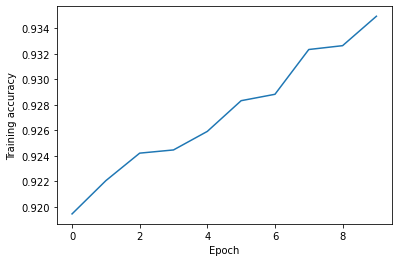

In [35]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()

In [84]:
filename = 'Cats_and_Dogs/log/puppy-dog.jpg'
np_image = Image.open(filename)
np_image = np.array(np_image).astype('float32') / 255
np_image = transform.resize(np_image, (150, 150, 3))
np_image = np.expand_dims(np_image, axis=0)
p = model.predict(np_image)[0, 0]

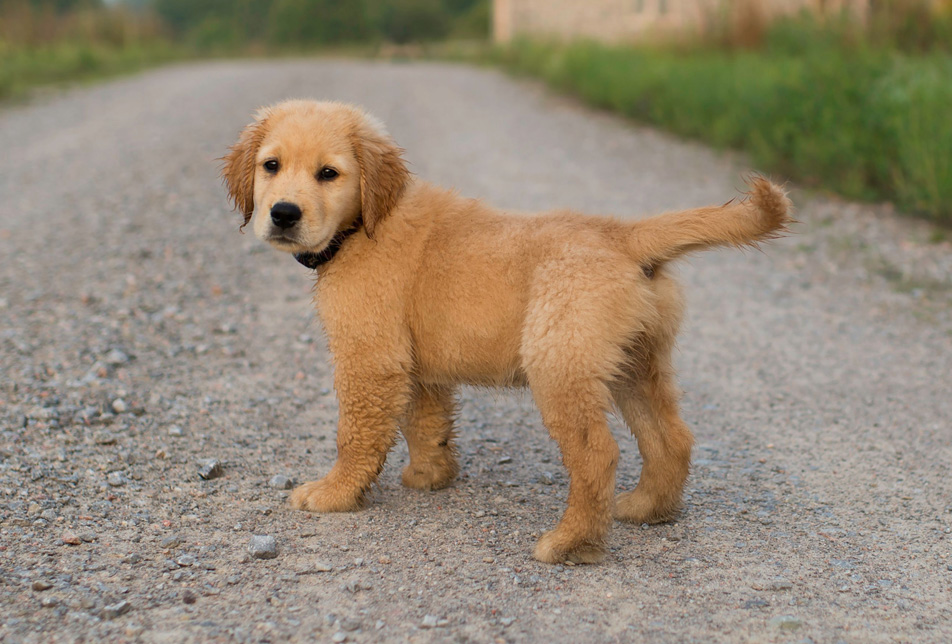

In [93]:
display.Image(filename, width=400)

In [94]:
print(f'Predicted probability of being a dog: {p}')

Predicted probability of being a dog: 0.9997259974479675
